## Tunnelling effect

<p align="center">
  <img src="https://www.ntmdt-si.com/data/media/images/spm_basics/scanning_tunnel_microscopy_stm/stm_physical_backgrounds/tunneling_effect/img04.gif" alt="Quantum tunnel effect" />
</p>

A quantum particle moves along a line with a potential barrier, as shown in the figure. The eigenfunctions of the hamiltonian are expressed piecewise:

\begin{equation*}
  \psi (x) =
  \begin{cases}
    \alpha e ^ {i k x} + \beta e ^ {- i k x} \quad \text{for} \quad x < 0  \\
    \gamma e ^ {- q x} + \delta e ^ {q x} \quad \text{for} \quad 0 \leq x \leq L  \\
    \varepsilon e ^ {i k x} \quad \text{for} \quad x > L
  \end{cases}
\end{equation*}

Where both $q$ and $k$ depend on energy $E$ in this way:

\begin{equation*}
k = \frac{\sqrt{2 m E}}{\hbar} \quad q = \frac{\sqrt{2 m (U_0 - E)}}{\hbar}
\end{equation*}

And $\alpha$, $\beta$, $\gamma$, $\delta$ and $\varepsilon$ are complex constants that satisfy the following linear system:

\begin{cases}
\alpha + \beta = \gamma + \delta \\
i k (\alpha - \beta) = q (\delta - \gamma) \\
\gamma e ^ {- q L} + \delta e ^ {q L} = \varepsilon e ^ {i k L} \\
q (\delta e ^ {q L} - \gamma e ^ {- q L}) = i k \varepsilon e ^ {i k L}
\end{cases}

Let's solve it to compute the tunnelling probability.

In [1]:
# Importing tools
from sympy import *
from numpy import linspace
from matplotlib.pyplot import *

style.use('bmh')

In [2]:
# Defining symbols
alpha, beta, gamma, delta, varepsilon = symbols("alpha, beta, gamma, delta, varepsilon", complex = True, nonzero = True)
q, k, L = symbols("q, k, L", real = True, positive = True)

In [3]:
# Defining the system as an augmented matrix
system = Matrix([[1, 1, -1, -1, 0, 0],
                     [I * k, - I * k, q, - q, 0, 0],
                     [0, 0, exp(- q * L), exp(q * L), - exp(I * k * L), 0],
                     [0, 0, -q * exp(- q * L), q * exp(q * L), - I * k * exp(I * k * L), 0]
                     ])
system

Matrix([
[  1,    1,           -1,         -1,               0, 0],
[I*k, -I*k,            q,         -q,               0, 0],
[  0,    0,    exp(-L*q),   exp(L*q),     -exp(I*L*k), 0],
[  0,    0, -q*exp(-L*q), q*exp(L*q), -I*k*exp(I*L*k), 0]])

In [4]:
# Solving the system with varepsilon free
sol = solve_linear_system(system, alpha, beta, gamma, delta, varepsilon)
sol

{alpha: varepsilon*(-I*k*exp(L*q)*exp(I*L*k)/(4*q) + I*k*exp(-L*q)*exp(I*L*k)/(4*q) + exp(L*q)*exp(I*L*k)/2 + exp(-L*q)*exp(I*L*k)/2 + I*q*exp(L*q)*exp(I*L*k)/(4*k) - I*q*exp(-L*q)*exp(I*L*k)/(4*k)),
 beta: varepsilon*(-I*k*exp(L*q)*exp(I*L*k)/(4*q) + I*k*exp(-L*q)*exp(I*L*k)/(4*q) - I*q*exp(L*q)*exp(I*L*k)/(4*k) + I*q*exp(-L*q)*exp(I*L*k)/(4*k)),
 gamma: varepsilon*(-I*k*exp(L*q)*exp(I*L*k)/(2*q) + exp(L*q)*exp(I*L*k)/2),
 delta: varepsilon*(I*k*exp(-L*q)*exp(I*L*k)/(2*q) + exp(-L*q)*exp(I*L*k)/2)}

In [5]:
alpha = sol[alpha].factor().simplify()
alpha

-I*varepsilon*(-I*k*exp(L*q) + I*k + q*exp(L*q) + q)*(I*k*exp(L*q) + I*k - q*exp(L*q) + q)*exp(L*(I*k - q))/(4*k*q)

In [6]:
re(alpha).simplify()

varepsilon*(2*k*q*(exp(2*L*q) + 1)*cos(L*k) + (k**2*exp(2*L*q) - k**2 - q**2*exp(2*L*q) + q**2)*sin(L*k))*exp(-L*q)/(4*k*q)

In [7]:
im(alpha).simplify()

varepsilon*(2*k*q*(exp(2*L*q) + 1)*sin(L*k) + (-k**2*exp(2*L*q) + k**2 + q**2*exp(2*L*q) - q**2)*cos(L*k))*exp(-L*q)/(4*k*q)

In [8]:
beta = sol[beta].factor().simplify()
beta

I*varepsilon*(1 - exp(L*q))*(k**2 + q**2)*(exp(L*q) + 1)*exp(L*(I*k - q))/(4*k*q)

In [9]:
re(beta).simplify()

varepsilon*(k**2 + q**2)*(exp(L*q) - 1)*(exp(L*q) + 1)*exp(-L*q)*sin(L*k)/(4*k*q)

In [10]:
im(beta).simplify()

varepsilon*(1 - exp(L*q))*(k**2 + q**2)*(exp(L*q) + 1)*exp(-L*q)*cos(L*k)/(4*k*q)

In [11]:
gamma = sol[gamma].factor().simplify()
gamma

-varepsilon*(I*k - q)*exp(L*(I*k + q))/(2*q)

In [12]:
re(gamma).simplify()

varepsilon*(k*sin(L*k) + q*cos(L*k))*exp(L*q)/(2*q)

In [13]:
im(gamma).simplify()

varepsilon*(-k*cos(L*k) + q*sin(L*k))*exp(L*q)/(2*q)

In [14]:
delta = sol[delta].factor().simplify()
delta

varepsilon*(I*k + q)*exp(L*(I*k - q))/(2*q)

In [15]:
re(delta).simplify()

varepsilon*(-k*sin(L*k) + q*cos(L*k))*exp(-L*q)/(2*q)

In [16]:
im(delta).simplify()

varepsilon*(k*cos(L*k) + q*sin(L*k))*exp(-L*q)/(2*q)

In [17]:
# Computing the transmission coefficient
T = ((Abs(varepsilon) / Abs(alpha)) ** 2).simplify()
T

16*k**2*q**2*exp(2*L*q)/(k**4*exp(4*L*q) - 2*k**4*exp(2*L*q) + k**4 + 2*k**2*q**2*exp(4*L*q) + 12*k**2*q**2*exp(2*L*q) + 2*k**2*q**2 + q**4*exp(4*L*q) - 2*q**4*exp(2*L*q) + q**4)

In [18]:
# Computing the reflection coefficient
R = (1 - T).cancel().factor()
R

(k**2 + q**2)**2*(exp(L*q) - 1)**2*(exp(L*q) + 1)**2/((k**2*exp(2*L*q) - 2*k**2*exp(L*q) + k**2 + q**2*exp(2*L*q) + 2*q**2*exp(L*q) + q**2)*(k**2*exp(2*L*q) + 2*k**2*exp(L*q) + k**2 + q**2*exp(2*L*q) - 2*q**2*exp(L*q) + q**2))

In [19]:
# Defining physical quatities
m, V0, hbar = symbols("m, V_0, hbar", real = True, positive = True, constant = True)
E = symbols("E", real = True, positive = True)

In [20]:
# T in terms of E
T = (T.subs([(k, (sqrt(2 * m * E)) / hbar), (q, (2 * m * (V0 - E)) / hbar)])).simplify()
T

32*E*m*(E - V_0)**2*exp(4*L*m*(E - V_0)/hbar)/(E**2 + 4*E*m*(E - V_0)**2 + 4*m**2*(E - V_0)**4 + 2*(-E**2 + 12*E*m*(E - V_0)**2 - 4*m**2*(E - V_0)**4)*exp(4*L*m*(E - V_0)/hbar) + (E**2 + 4*E*m*(E - V_0)**2 + 4*m**2*(E - V_0)**4)*exp(8*L*m*(E - V_0)/hbar))

In [21]:
# Limit as E approaches V0
limit(T, E, V0).simplify()

2*hbar**2/(L**2*V_0*m + 2*hbar**2)

In [22]:
# Lambdifying for plotting
R = lambdify((m, L, hbar, V0, E), 1 - T, "numpy")
T = lambdify((m, L, hbar, V0, E), T, "numpy")

# Just for sketching the curve
m = 1
L = 1
hbar = 1
V0 = 1

# 0 <= E < V0
E = linspace(0 , V0 * 0.999, 1000)

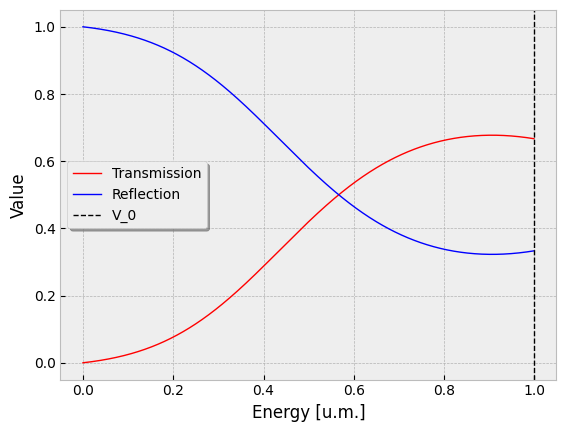

In [23]:
# Plotting T and R
plot(E, T(m, L, hbar, V0, E), color = "red", label = "Transmission", linewidth = 1)
plot(E, R(m, L, hbar, V0, E), color = "blue", label = "Reflection", linewidth = 1)
axvline(V0, linestyle = "--", color = "black", label = "V_0", linewidth = 1)
xlabel("Energy [u.m.]")
ylabel("Value")
legend(shadow = True)